In [4]:
import matplotlib.pyplot as plt   # plot library

# Download fashion dataset from Tensorflow datasets

In [5]:
from tensorflow.keras.datasets import fashion_mnist # fashion_mnist is a free dataset with 70,000 fashion images 28X28 pixels

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()#Split dataset into train and test. Each image with it's label/output

4422102/4422102 [==============================] - 1s 0us/step


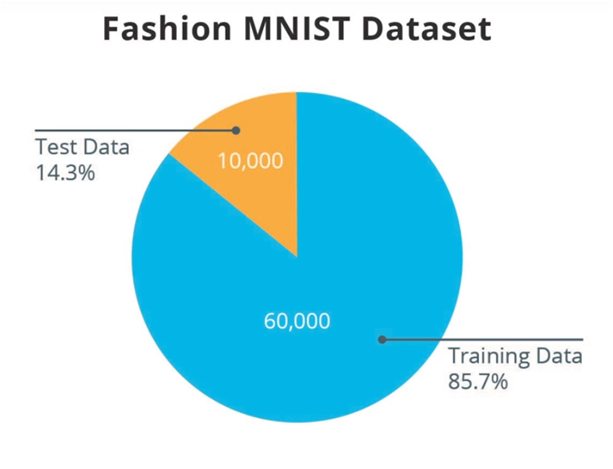

In [6]:
x_train.shape  # 60000 images each 28 X 28 pixels

(60000, 28, 28)

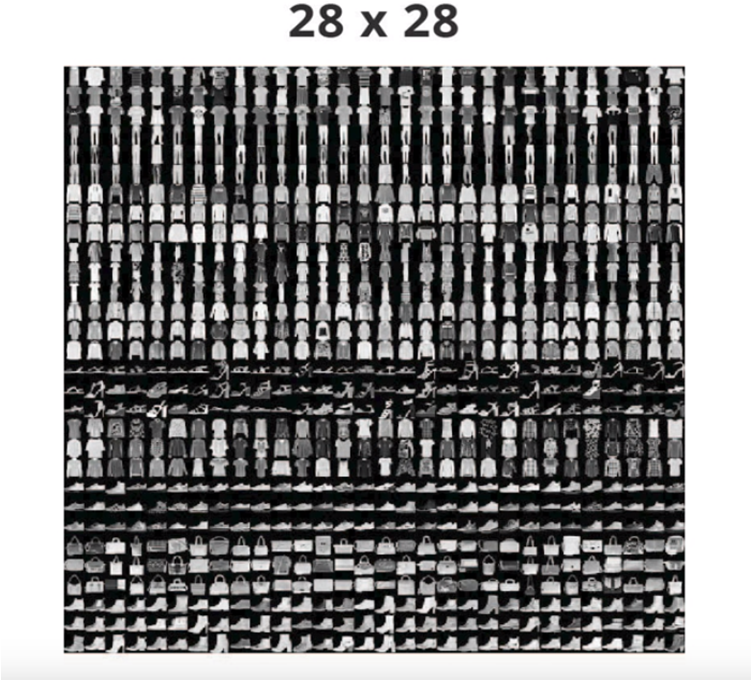

In [7]:
x_train[1]  # the ranges are from 0 to 255 # gray scale.  28 by 28

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [8]:
# create a dictionary for fashion 

fashion = {"T-shirt":0, "Trouser": 1, "Pullover":2, "Dress":3, "Coat":4 ,"Sandal":5, "Shirt":6, "Sneaker":7, "Bag":8, "Ankle boot":9}

for key, value in fashion.items():
    print ( value ,"is ",key)


0 is  T-shirt
1 is  Trouser
2 is  Pullover
3 is  Dress
4 is  Coat
5 is  Sandal
6 is  Shirt
7 is  Sneaker
8 is  Bag
9 is  Ankle boot


In [9]:
y_train[1]  # this is the label corresponding to the above image. range from 0 to 9. This is how the NN intepretes the pics

0

### Labels are the outputs, Images are the inputs

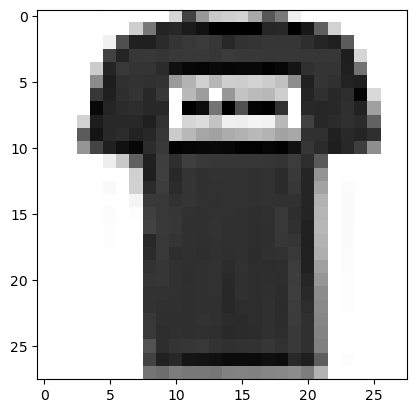

In [10]:
plt.imshow(x_train[1], cmap=plt.cm.binary)   # plot first image using imshow() which plots images

# Method 1. Basic Neural networks

In [11]:
from tensorflow.keras.models import Sequential       
from tensorflow.keras.layers import Dense, Activation, Flatten

2023-01-05 21:58:59.351129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1875/1875 [==============================] - 1s 604us/step - loss: 2.2282 - accuracy: 0.2535
Epoch 2/10
1875/1875 [==============================] - 1s 593us/step - loss: 1.3488 - accuracy: 0.4599
Epoch 3/10
1875/1875 [==============================] - 1s 590us/step - loss: 1.0330 - accuracy: 0.5873
Epoch 4/10
1875/1875 [==============================] - 1s 588us/step - loss: 0.9146 - accuracy: 0.6305
Epoch 5/10
1875/1875 [==============================] - 1s 583us/step - loss: 0.8626 - accuracy: 0.6408
Epoch 6/10
1875/1875 [==============================] - 1s 608us/step - loss: 0.8426 - accuracy: 0.6507
Epoch 7/10
1875/1875 [==============================] - 1s 586us/step - loss: 0.8297 - accuracy: 0.6538
Epoch 8/10
1875/1875 [==============================] - 1s 586us/step - loss: 0.8151 - accuracy: 0.6581
Epoch 9/10
1875/1875 [==============================] - 1s 591us/step - loss: 0.8051 - accuracy: 0.6605
Epoch 10/10
1875/1875 [==============================] - 1s 586u

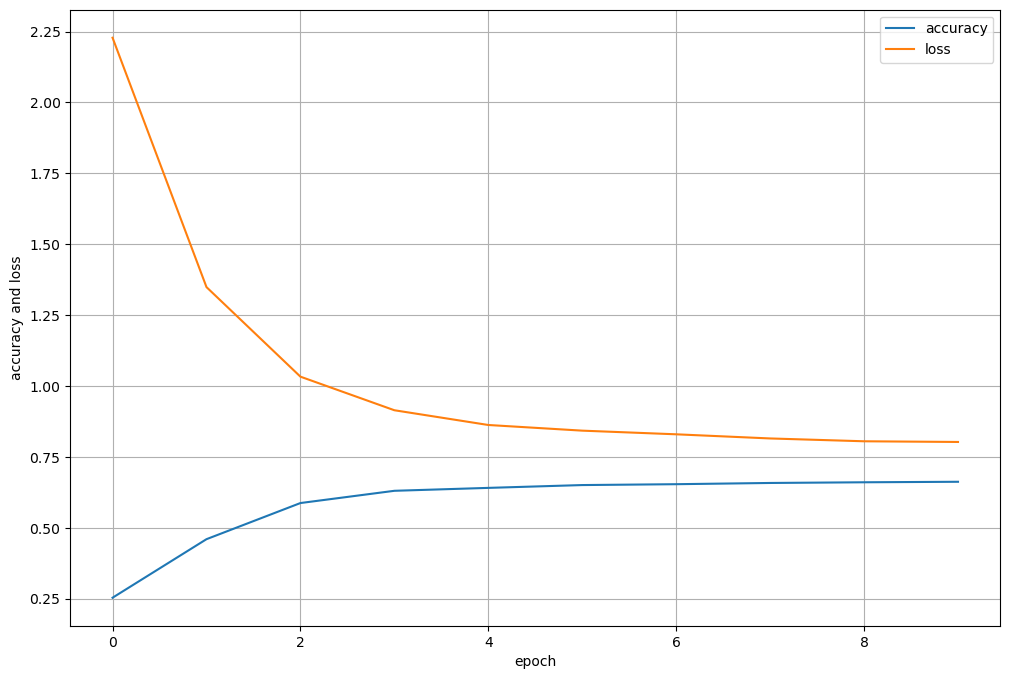

In [12]:
model = Sequential()  # build model

model.add(Flatten(input_shape=[28,28]))# Flatten converts to one-D array, Input shape is 28 by 28. size of image pixel
#model.add(Dense(48, activation = 'relu'))  # add hidden layers and add activation function
model.add(Dense(24, activation = 'relu'))  # add hidden layers and add activation function
model.add(Dense(10, activation = 'softmax'))  # out put neurons are 10. that is 0-9. output labels

model.compile(loss='sparse_categorical_crossentropy', optimizer='ADAM', metrics= ["accuracy"])

history = model.fit(x_train, y_train, epochs = 10)

# Plot the accuracy and loss curves
plt. figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

### Accuracy is not good!! Improve it by adding more hidden layers and neurons in the each layer

# Make Predictions on Test dataset

In [13]:
test_Predict = model.predict(x_test)  # .predict 

313/313 [==============================] - 0s 416us/step


In [14]:
#test_loss, test_accuracy = model.evaluate(x_test, y_test)
#print ('Accuracy on test dataset:', test_accuracy)

In [15]:
test_Predict[0]  # Shows an array of possibilities for each image.  predict diffrent images from 0 to 9,999 position in x_test

array([0.0000000e+00, 1.4630022e-28, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.0365595e-01, 0.0000000e+00, 3.3615497e-01,
       1.1386701e-06, 3.6018792e-01], dtype=float32)

In [16]:
import numpy as np   # You have to study NUMPY library

y = test_Predict[0].argmax()   # Shows index with highest probability
print (y)

for key, value in fashion.items():
    if y == value:
        print (f"Model predicts that it's a ",key)

9
Model predicts that it's a  Ankle boot


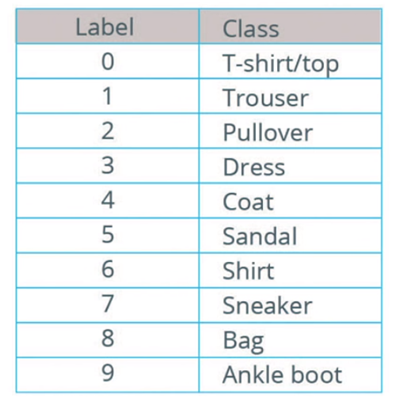

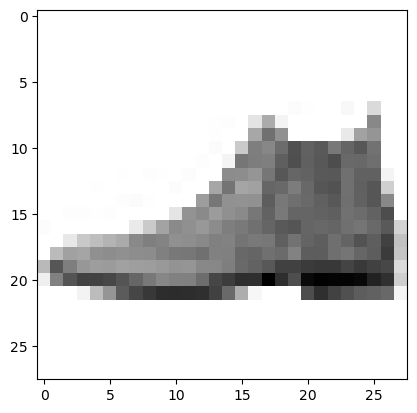

In [17]:
plt.imshow(x_test[0], cmap=plt.cm.binary)

# Learn more!

# Method 2: Using Convolutional Neural Networks (CNN) for Image processing.

# Preprocessing

In [18]:
x_train1 = x_train/255   # Normalise the inputs. change from (0 to 255) to range (0 to 1)
x_test1 = x_test/255

### convert to 4 dimensional input for Conv2D

In [19]:
x_train1= x_train1.reshape([x_train.shape[0],28, 28,1])
x_test1= x_test1.reshape([x_test.shape[0],28, 28,1])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [21]:
model = Sequential()  # build model

model.add(Conv2D(32, (3,3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))  # 64 filters with size (3,3)
model.add(MaxPooling2D(2, 2))

       # The second convolution
model.add(Conv2D(64, (3,3),padding = 'same', activation='relu'))
model.add(MaxPooling2D(2,2))
      # Flatten the output
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))  # add hidden layers and add activation function
model.add(Dense(10, activation = 'softmax'))  # out put neurons are 10. that is 0-9. output labels

model.compile(loss='sparse_categorical_crossentropy', optimizer='ADAM', metrics= ["accuracy"])

model.fit(x_train1, y_train, epochs = 5)

model.summary()


Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3990 - accuracy: 0.8571
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2590 - accuracy: 0.9046
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2144 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1831 - accuracy: 0.9319
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1570 - accuracy: 0.9410
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 

## Max pooling and Flatten layers explained

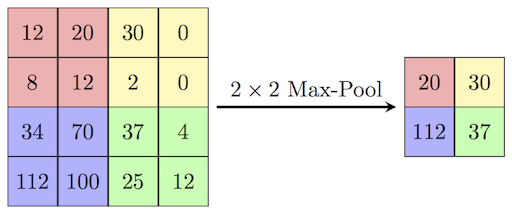

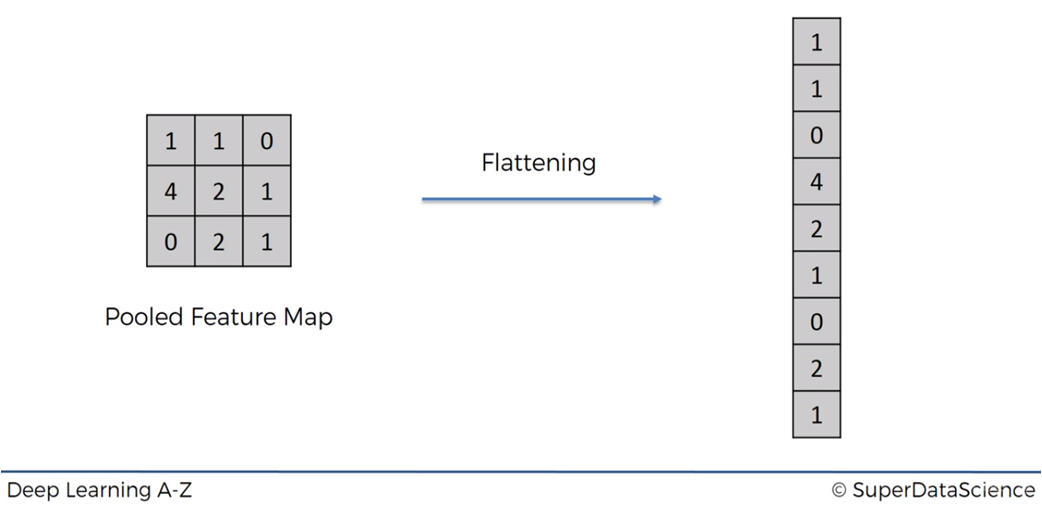

# Lets evaluate model on test dataset

In [22]:
test_loss, test_accuracy = model.evaluate(x_test1, y_test)
print ('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.2306 - accuracy: 0.9178
Accuracy on test dataset: 0.9178000092506409


In [23]:
y = model.predict(x_test1)   # Call prediction method

313/313 [==============================] - 1s 4ms/step


# make predictions

In [24]:
print (y[234])  # shows highest probability which corresponds to the labels. ( 9 is highest here)

[3.4529730e-09 1.2693284e-09 6.9341288e-09 6.6551831e-09 2.5819161e-11
 1.0154537e-06 3.6133788e-10 5.2173782e-06 5.5130983e-10 9.9999380e-01]


In [25]:
import numpy as np  # library for maths operations on matrices and vectors
x = np.argmax(y[234])  # picks position/index of maximum number from a matrix

fashion = {"T-shirt":0, "Trouser": 1, "Pullover":2, "Dress":3, "Coat":4 ,"Sandal":5, "Shirt":6, "Sneaker":7, "Bag":8, "Ankle boot":9}

for key, value in fashion.items():
    if x == value:
        print (f"Model predicts that it's ",key)

Model predicts that it's  Ankle boot


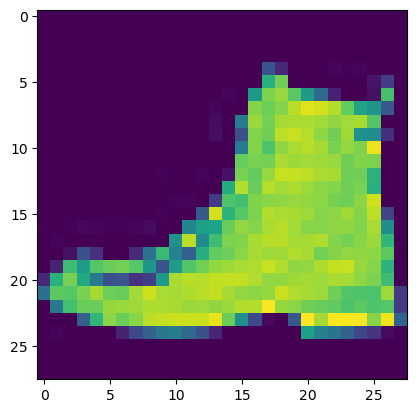

In [26]:
plt.imshow(x_test[234])

## For colored images, Convolutional Neural network 3D are used.

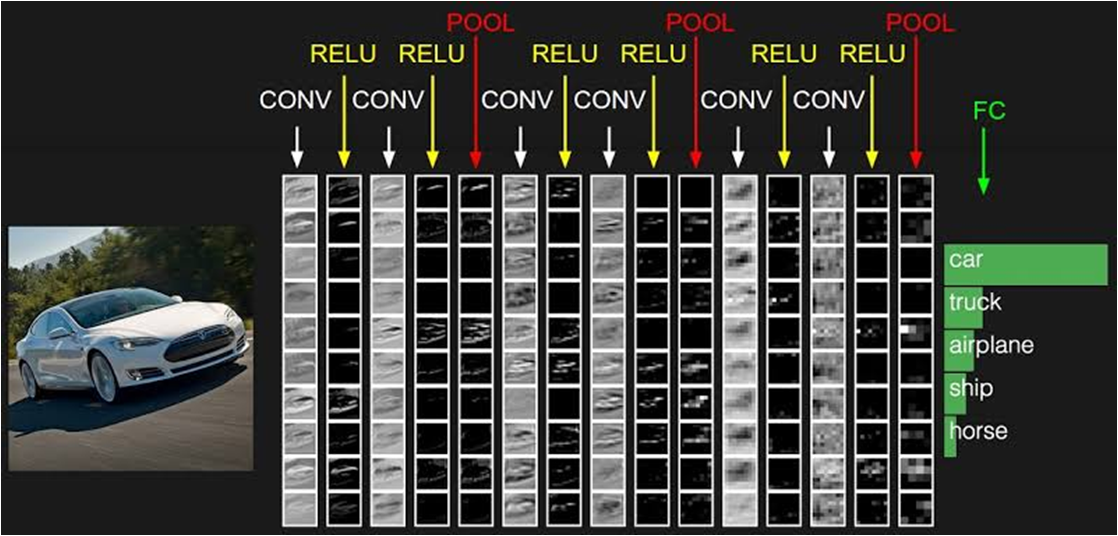